# QUEENS DATA -  LSTM - Multi-Step Forecast - Vector Output Model


## Here I have done the following:

1. Followed steps from this website:
[https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/)

2. Import necessary modules

3. Fixed the parameters of the code to take in input of previous 60 days and output the next 30 days
    - n_steps_in = 60
    - n_steps_out = 30
    
4. Define the model and predict 30 days of data
5. Note any observations

In [51]:
# Imports
import numpy as np
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
#Supress default INFO logging
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import logging, sys
warnings.simplefilter(action='ignore', category=FutureWarning)

In [52]:
df = pd.read_csv('datasets/rollingsales_queens.xls_prepped_bare.csv', usecols=['SALE DATE', 'SALE PRICE'])

In [53]:
df = df.dropna()
df = df.reset_index(drop=True)

In [54]:
df = df.rename(columns={'SALE DATE':'ts', 'SALE PRICE': 'y'})
df.columns = df.columns.astype(str)
df = df.set_index(['ts'], drop=True)
df.index= pd.to_datetime(df.index)

In [68]:
# df

In [56]:
df = df.resample('D').mean()
df = df.reset_index()

In [57]:
df.dropna(inplace=True)
df

,ts,y
0,2020-04-01,961150.000000
1,2020-04-02,753357.142857
2,2020-04-03,681724.206897
5,2020-04-06,725208.000000
6,2020-04-07,630053.736842
...,...,...
358,2021-03-25,609609.756098
359,2021-03-26,652589.285714
362,2021-03-29,694114.470588
363,2021-03-30,747610.935484


In [58]:
raw_input_test = list(df['y'])
raw_input_test
np.shape(df.index)

(295,)

## Below steps are taken from:

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [59]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = raw_input_test

# choose a number of time steps
n_steps_in, n_steps_out = 60, 30

# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)


# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=0)


In [60]:
# demonstrate prediction

x_input = array(raw_input_test[235:295])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[189182.31  754080.56  821322.1   526699.75  573875.75  659312.75
  339169.44  730602.94  353080.4   684978.1   852801.44  428879.56
  829826.06  501576.34  385813.7   613163.3   -96253.11  -71834.836
  801913.5   683128.2   823552.2    27342.654 910184.9   763845.94
  861066.25  640993.8   656113.44  943044.4   704029.75  804944.94 ]]


In [61]:
np.shape(list(yhat))

(1, 30)

In [62]:
y_hat1 = np.reshape(yhat, (30,1))
np.shape(y_hat1)

(30, 1)

In [66]:
# I increased the epochs and the predictions went higher.
x_list = list(range(1,325))

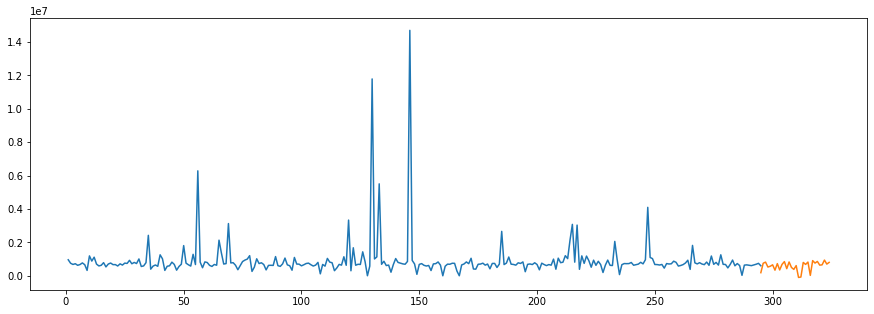

In [67]:
plt.figure(figsize=(15,5))
fig =plt.plot(x_list[0:295], df['y'][0:295])
ax = plt.plot(x_list[294:325], y_hat1)

## Observation

Queens prices per model show stable with some dips